<a href="https://colab.research.google.com/github/simon07uca/Clase3/blob/master/TRABAJO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# 📌 TRABAJO FINAL ICD 2025 - MACHINE LEARNING
# Predicción del rendimiento académico de estudiantes

# =============================
# 1. CARGA DE LIBRERÍAS Y DATOS
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
# 📌 TRABAJO FINAL ICD 2025 - MACHINE LEARNING
# Predicción del rendimiento académico de estudiantes

# =============================
# 1. CARGA DE LIBRERÍAS Y DATOS
# =============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


In [4]:
# Cargar los datos desde el archivo CSV
ingreso_data = pd.read_csv('/content/trabajo-final-/Adult Census Income_TF (1).csv')
ingreso_data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40,United-States,<=50K
1,82,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0.0,4356.0,18,United-States,<=50K
2,66,?,186061,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40,United-States,<=50K
5,34,Private,216864,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0.0,3770.0,45,United-States,<=50K
6,38,Private,150601,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0.0,3770.0,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0.0,3683.0,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,NaN,40,United-States,<=50K
9,41,Private,70037,Some-college,NaN,Never-married,Craft-repair,Unmarried,White,Male,0.0,3004.0,60,?,>50K


In [7]:
# Dimesiones del df; filas y coluknas:
ingreso_data.shape

(32561, 15)

In [8]:
# Tipo de dato de cada columna:
ingreso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education.num   31585 non-null  float64
 5   marital.status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital.gain    30933 non-null  float64
 11  capital.loss    29305 non-null  float64
 12  hours.per.week  32561 non-null  int64  
 13  native.country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.7+ MB


In [ ]:
# Cantidad de valores nulos en el df:
print(f"\nValores nulos por columna:\n \n{ingreso_data.isnull().sum()}")


Valores nulos por columna:
 
age                  0
workclass            0
fnlwgt               0
education            0
education.num      976
marital.status       0
occupation           0
relationship         0
race                 0
sex                  0
capital.gain      1628
capital.loss      3256
hours.per.week       0
native.country       0
income               0
dtype: int64


In [ ]:
# Estadisticas descriptivas:
ingreso_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,31585.000000,30933.000000,29305.000000,32561.000000
mean,38.581647,1.897784e+05,10.082128,1059.891281,86.546153,40.437456
std,13.640433,1.055500e+05,2.573557,7254.957003,401.200053,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Cantidad total de personas analizados:
total_personas = len(ingreso_data)
print(f"Personas totales: {total_personas}")

Personas totales: 32561


In [ ]:
# Cantidad de ingresos mayores a 50K y menores o iguales a 50K
print(ingreso_data['income'].value_counts())


ingreso_mayor = ingreso_data[ingreso_data['income'] == '>50K']
ingreso_menor = ingreso_data[ingreso_data['income'] == '<=50K']




income
<=50K    24720
>50K      7841
Name: count, dtype: int64


In [ ]:
porcentaje_mayor=(len(ingreso_mayor)/total_personas)*100
porcentaje_menor=(len(ingreso_menor)/total_personas)*100
print(f"Personas con ingresos mayores a 50K: {len(ingreso_mayor)} ({porcentaje_mayor:.2f}%)")
print(f"Personas con ingresos menores o iguales a 50K: {len(ingreso_menor)} ({porcentaje_menor:.2f}%)")

Personas con ingresos mayores a 50K: 7841 (24.08%)
Personas con ingresos menores o iguales a 50K: 24720 (75.92%)


In [ ]:
#Ahora queremos saber que en porcenatje si las mujres o los hombres ganan mas:
tabla_genero_ingreso = pd.crosstab(ingreso_data['sex'], ingreso_data['income'])
print(tabla_genero_ingreso)

income  <=50K  >50K
sex                
Female   9592  1179
Male    15128  6662


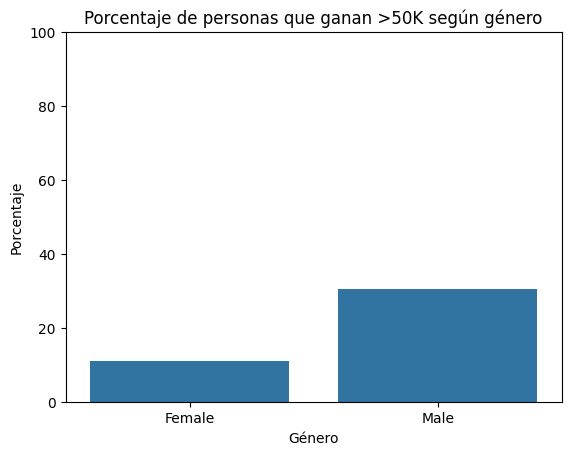

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertimos a DataFrame para graficar
porcentajes_mayor50k = porcentajes['>50K'].reset_index()

# Gráfico
sns.barplot(x='sex', y='>50K', data=porcentajes_mayor50k)
plt.title('Porcentaje de personas que ganan >50K según género')
plt.ylabel('Porcentaje')
plt.xlabel('Género')
plt.ylim(0, 100)
plt.show()

In [ ]:
# Porcentaje de personas que ganan >50K por género
porcentajes = tabla_genero_ingreso.apply(lambda x: x / x.sum() * 100, axis=1)
print(porcentajes['>50K'])

sex
Female    10.946059
Male      30.573658
Name: >50K, dtype: float64


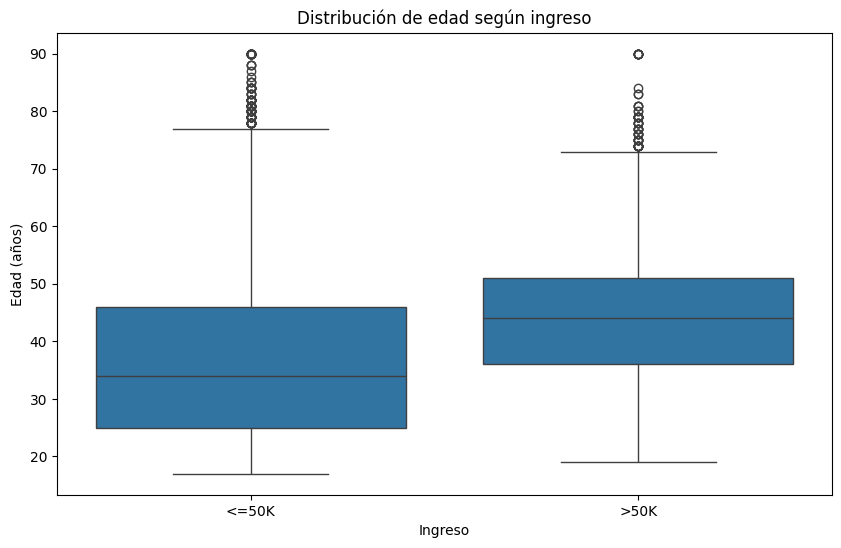

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=ingreso_data)
plt.title('Distribución de edad según ingreso')
plt.xlabel('Ingreso')
plt.ylabel('Edad (años)')
plt.show()

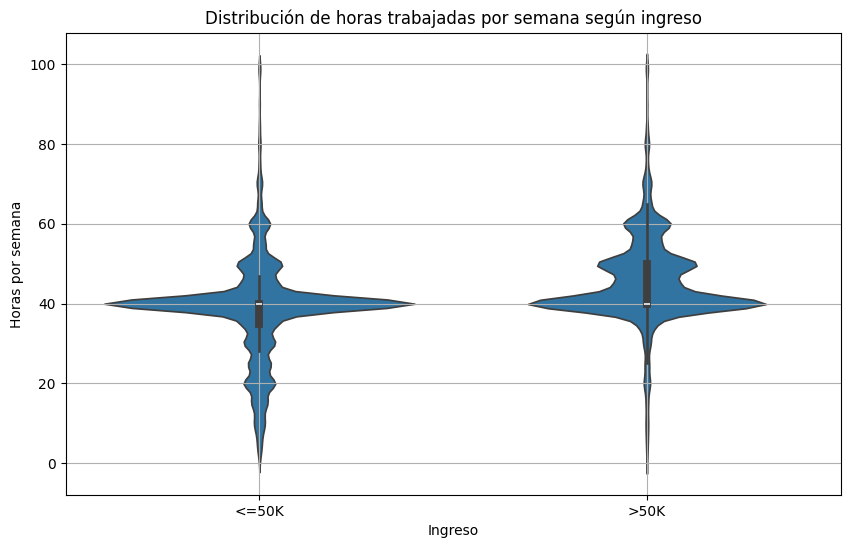

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='income', y='hours.per.week', data=ingreso_data)
plt.title('Distribución de horas trabajadas por semana según ingreso')
plt.xlabel('Ingreso')
plt.ylabel('Horas por semana')
plt.grid(True)
plt.show()

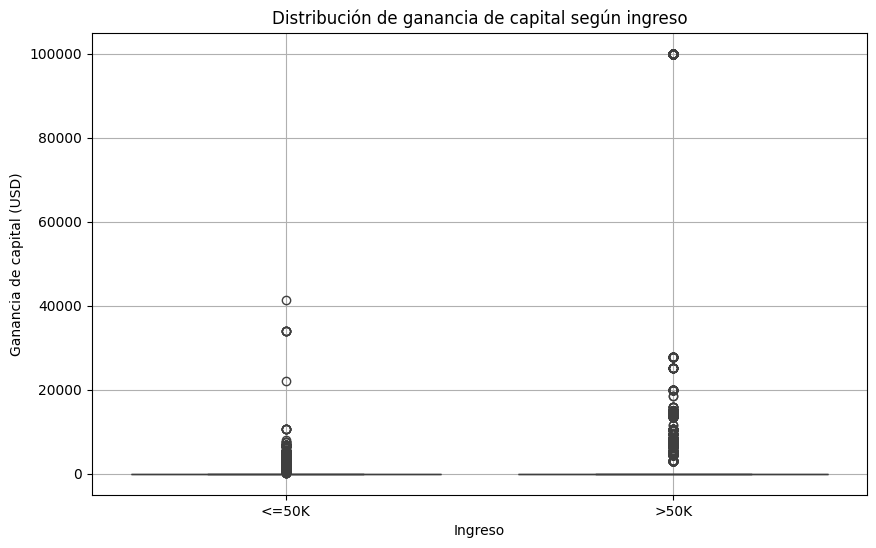

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital.gain', data=ingreso_data)
plt.title('Distribución de ganancia de capital según ingreso')
plt.xlabel('Ingreso')
plt.ylabel('Ganancia de capital (USD)')
plt.grid(True)
plt.show()

In [ ]:
#Evaluacion de nulos


ingreso_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,976
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
    ingreso_data['education.num'].fillna(ingreso_data['education.num'].median(), inplace=True)

/tmp/ipython-input-25-3163400669.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ingreso_data['education.num'].fillna(ingreso_data['education.num'].median(), inplace=True)


In [ ]:
#Rellenar valores nulos con 0
ingreso_data['capital.gain'].fillna(0, inplace=True)
ingreso_data['capital.loss'].fillna(0, inplace=True)

/tmp/ipython-input-26-3980907502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ingreso_data['capital.gain'].fillna(0, inplace=True)
/tmp/ipython-input-26-3980907502.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
#Verificamos is queda algun nulo
ingreso_data.isnull().values.any()

np.False_

In [ ]:
#Cuantas celdas vacias quedan? aca lo verificamoos

ingreso_data.isnull().sum().sum()

np.int64(0)

In [ ]:
# Eliminar espacios extras en columnas categóricas
for col in ingreso_data.select_dtypes(include='object'):
    ingreso_data[col] = ingreso_data[col].str.strip()

In [ ]:
# Crear variables dummies para todas las variables categóricas
ingreso_encoded = pd.get_dummies(ingreso_data, drop_first=True)

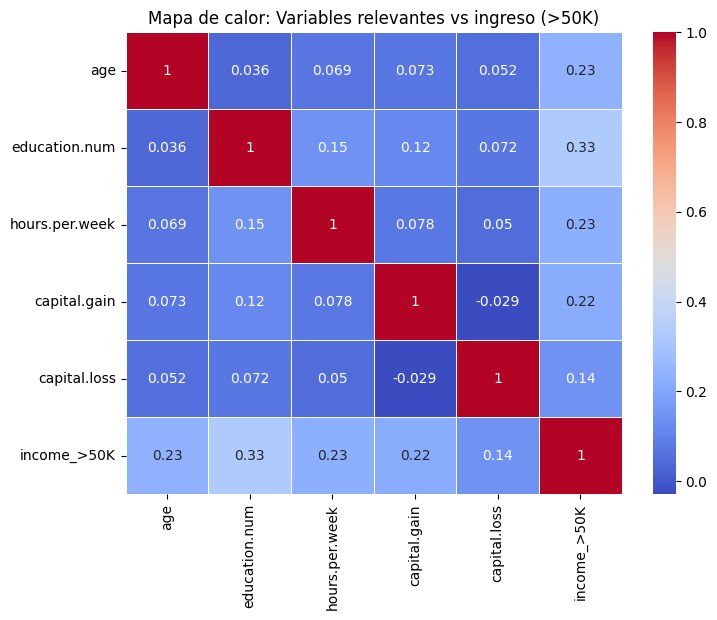

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las variables más relevantes (predictoras numéricas + target)
columnas_importantes = [
    'age',
    'education.num',
    'hours.per.week',
    'capital.gain',
    'capital.loss',
    'income_>50K'  # Variable objetivo
]

# Mapa de calor de correlaciones entre esas variables
plt.figure(figsize=(8, 6))
sns.heatmap(ingreso_encoded[columnas_importantes].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor: Variables relevantes vs ingreso (>50K)')
plt.show()

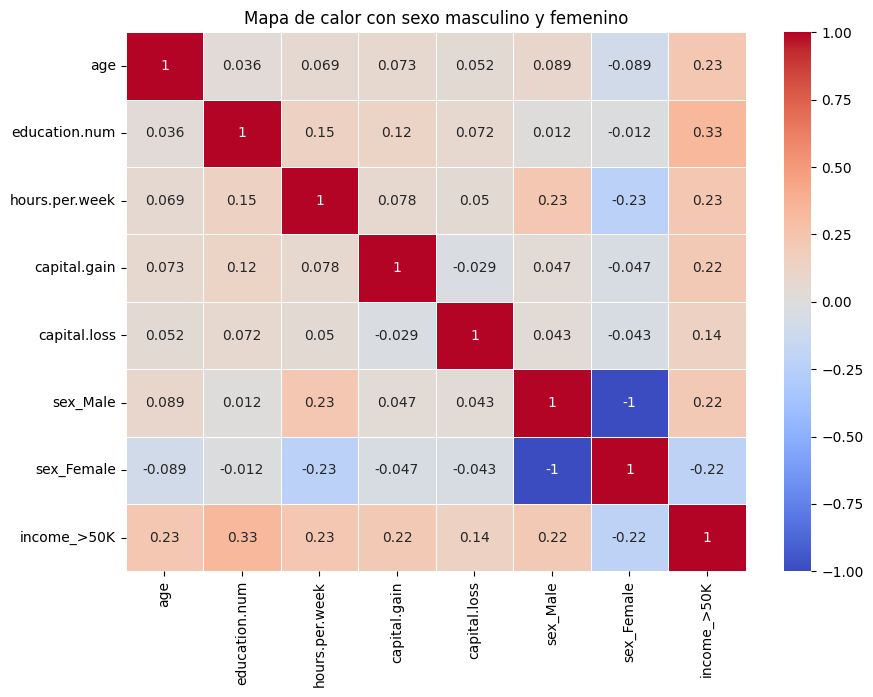

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


ingreso_con_sexo = pd.get_dummies(ingreso_data, drop_first=False)

# Seleccionamos las columnas importantes
columnas_con_dos_sexos = [
    'age',
    'education.num',
    'hours.per.week',
    'capital.gain',
    'capital.loss',
    'sex_Male',
    'sex_Female',
    'income_>50K'
]

# Mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(ingreso_con_sexo[columnas_con_dos_sexos].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor con sexo masculino y femenino')
plt.show()

In [ ]:
# 🔹 1. Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# 🔹 3. Eliminar espacios extras de texto en columnas categóricas
for col in ingreso_data.select_dtypes(include='object'):
    ingreso_data[col] = ingreso_data[col].str.strip()

# 🔹 4. Separar variables predictoras y objetivo
X = ingreso_data.drop('income', axis=1)
y = ingreso_data['income'].apply(lambda x: 1 if x == '>50K' else 0)

# 🔹 5. Codificar variables categóricas (One-Hot Encoding)
X_encoded = pd.get_dummies(X, drop_first=True)

# 🔹 6. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# 🔹 7. Escalar variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

🔹 REGRESIÓN LOGÍSTICA
Accuracy:  0.8465
Precision: 0.7133
Recall:    0.5843
F1-score:  0.6423

📋 Reporte completo:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4976
           1       0.71      0.58      0.64      1537

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.77      6513
weighted avg       0.84      0.85      0.84      6513



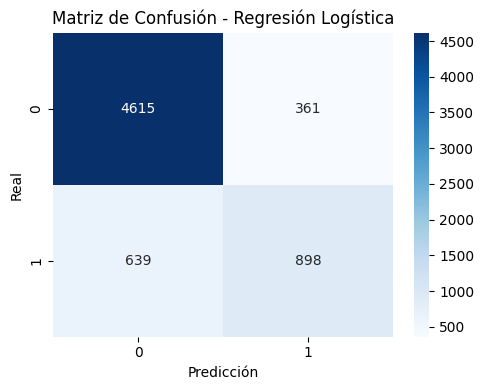

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Entrenar modelo de regresión logística
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(X_train_scaled, y_train)

# 2. Predecir
y_pred_log = modelo_log.predict(X_test_scaled)

# 3. Métricas
acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# 4. Mostrar resultados
print("🔹 REGRESIÓN LOGÍSTICA")
print(f"Accuracy:  {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall:    {rec_log:.4f}")
print(f"F1-score:  {f1_log:.4f}")
print("\n📋 Reporte completo:")
print(classification_report(y_test, y_pred_log))

# 5. Matriz de Confusión
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

=== Reporte completo - Árbol de Decisión ===
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4976
           1       0.59      0.61      0.60      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513



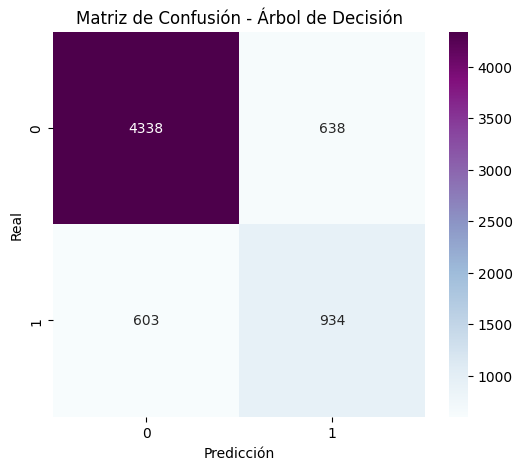

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Entrenar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train_scaled, y_train)

# 2. Predecir
y_pred_arbol = modelo_arbol.predict(X_test_scaled)

# 3. Reporte de métricas
print("=== Reporte completo - Árbol de Decisión ===")
print(classification_report(y_test, y_pred_arbol))

# 4. Matriz de confusión
cm_arbol = confusion_matrix(y_test, y_pred_arbol)

plt.figure(figsize=(6,5))
sns.heatmap(cm_arbol, annot=True, fmt='d', cmap='BuPu')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


=== Random Forest con GridSearchCV ===
Mejores parámetros: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8561
Precision: 0.7344
Recall: 0.6116
F1 Score: 0.6674
ROC AUC: 0.9071

Reporte completo:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4976
           1       0.73      0.61      0.67      1537

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



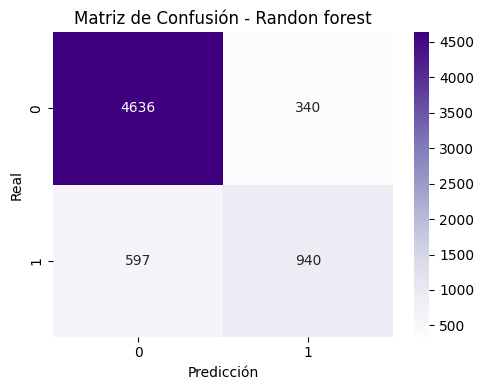

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Definir la grilla de hiperparámetros
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# 2. Crear el objeto GridSearchCV
gs_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# 3. Entrenar con las combinaciones posibles
gs_rf.fit(X_train_scaled, y_train)
best_rf = gs_rf.best_estimator_

# 4. Predecir con el mejor modelo
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

# 5. Métricas
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc = roc_auc_score(y_test, y_prob_rf)

print("\n=== Random Forest con GridSearchCV ===")
print("Mejores parámetros:", gs_rf.best_params_)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")

# 6. Reporte completo
print("\nReporte completo:\n", classification_report(y_test, y_pred_rf))

# 7. Matriz de Confusión
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Matriz de Confusión - Randon forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

📊 Comparación de rendimiento entre modelos (ambas clases):


,Modelo,Accuracy,Precision (<=50K),Recall (<=50K),F1-score (<=50K),Precision (>50K),Recall (>50K),F1-score (>50K)
0,Regresión Logística,0.85,0.88,0.93,0.90,0.71,0.58,0.64
1,Árbol de Decisión,0.81,0.88,0.87,0.87,0.59,0.61,0.60
2,Random Forest,0.86,0.89,0.93,0.91,0.73,0.61,0.67


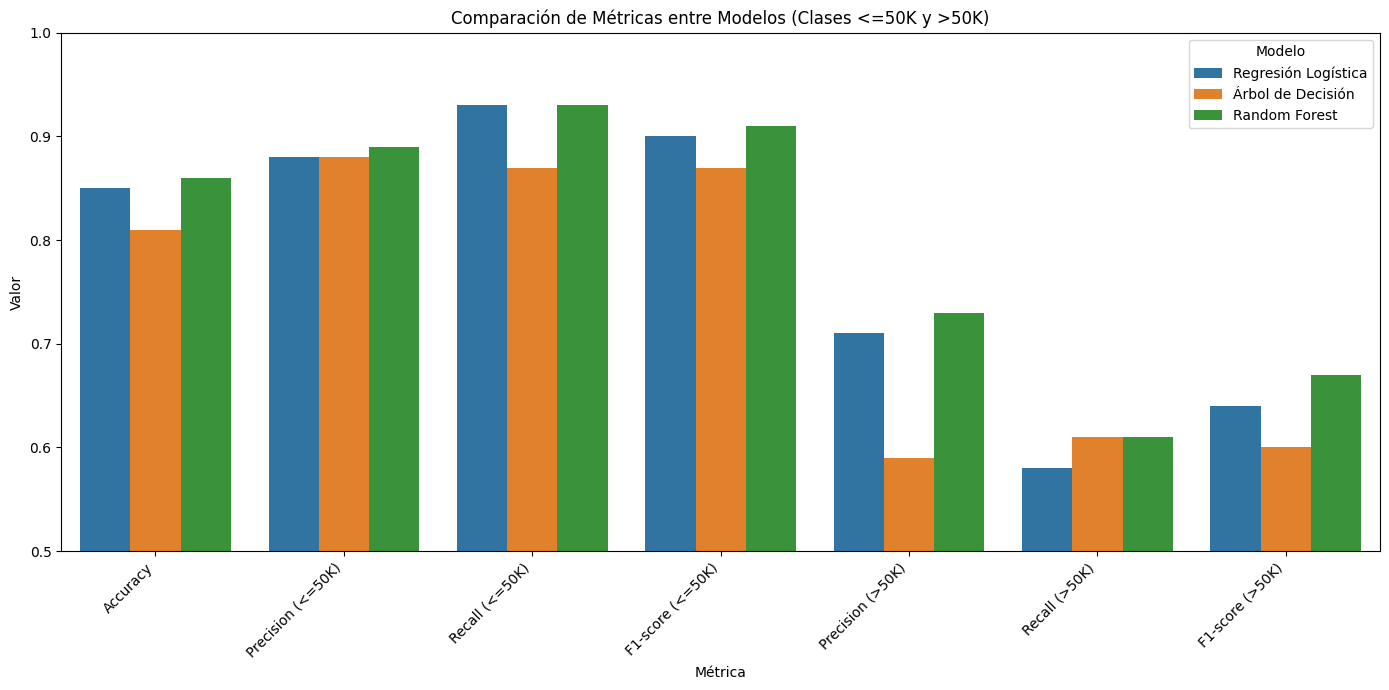

In [ ]:
 plt.show()
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diccionario con métricas de ambas clases
comparacion_modelos = {
    'Modelo': ['Regresión Logística', 'Árbol de Decisión', 'Random Forest'],
    'Accuracy': [0.85, 0.81, 0.86],
    'Precision (<=50K)': [0.88, 0.88, 0.89],
    'Recall (<=50K)': [0.93, 0.87, 0.93],
    'F1-score (<=50K)': [0.90, 0.87, 0.91],
    'Precision (>50K)': [0.71, 0.59, 0.73],
    'Recall (>50K)': [0.58, 0.61, 0.61],
    'F1-score (>50K)': [0.64, 0.60, 0.67]
}

# Crear DataFrame
df_comparacion = pd.DataFrame(comparacion_modelos)

# Mostrar tabla
print(" Comparación de rendimiento entre modelos (ambas clases):")
display(df_comparacion)

# Derretir el DataFrame para graficar
df_melt = df_comparacion.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

# Crear gráfico de barras
plt.figure(figsize=(14, 7))
sns.barplot(data=df_melt, x='Métrica', y='Valor', hue='Modelo')
plt.title("Comparación de Métricas entre Modelos (Clases <=50K y >50K)")
plt.ylabel("Valor")
plt.xlabel("Métrica")
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, 1.0)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()